In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset as NetCDFFile

### Read simulated results from IBMWeatherGen

In [2]:
df = pd.read_csv("ibmwg-simulations_2025-01-05T16.51.21.csv")
df = df.drop("n_simu", axis = 1)
df = df.set_index(["Date", "Latitude", "Longitude"])

### Convert to netCDF4 for plotting

In [3]:
xr = df.to_xarray()
nc = xr.to_netcdf('simulation_with_wind.nc')

### Plotting

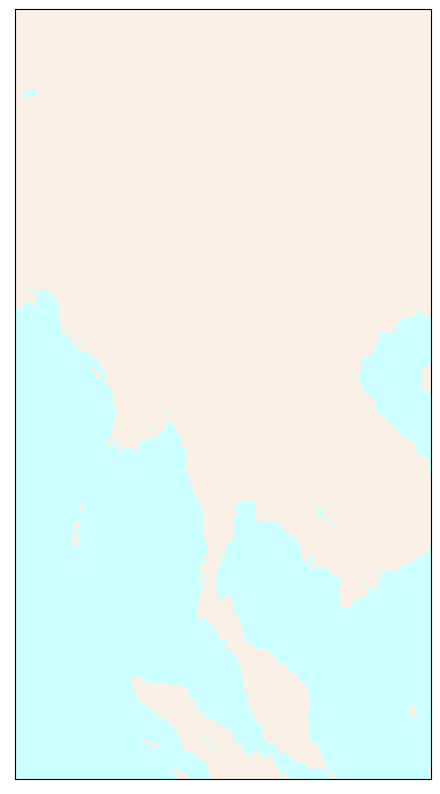

In [11]:
nc = NetCDFFile('simulation_with_wind.nc')
lat = nc.variables['Latitude'][:]
lon = nc.variables['Longitude'][:]
time = nc.variables['Date'][:]
precip = nc.variables['precipitation'][:]
t_min = nc.variables['t_min'][:]
t_max = nc.variables['t_max'][:]
wind = nc.variables['wind'][:]

plt.figure(figsize=(15,10))
map = Basemap(projection='merc',llcrnrlon=90.,llcrnrlat=1.,urcrnrlon=109.,urcrnrlat=34.,resolution='i')
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

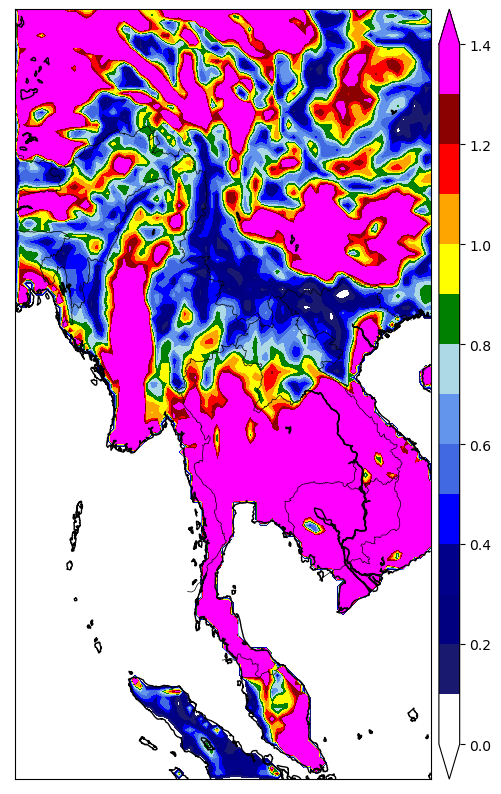

In [5]:
# For plotting independent days
i = 0

lons,lats= np.meshgrid(lon,lat)
x,y = map(lons,lats)
plt.figure(figsize=(15,10))

temp = map.contourf(x,y,wind[i,:,:], 
                    levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 
                    colors = ['white', 'midnightblue', 'navy', 'darkblue', 'blue', 'royalblue', 'cornflowerblue', 'lightblue', 'green', "yellow", "orange", "red", "darkred", "magenta"], 
                    extend='both')
cb = map.colorbar(temp,"right", size="5%", pad="2%")
map.drawcoastlines()
map.drawcountries()

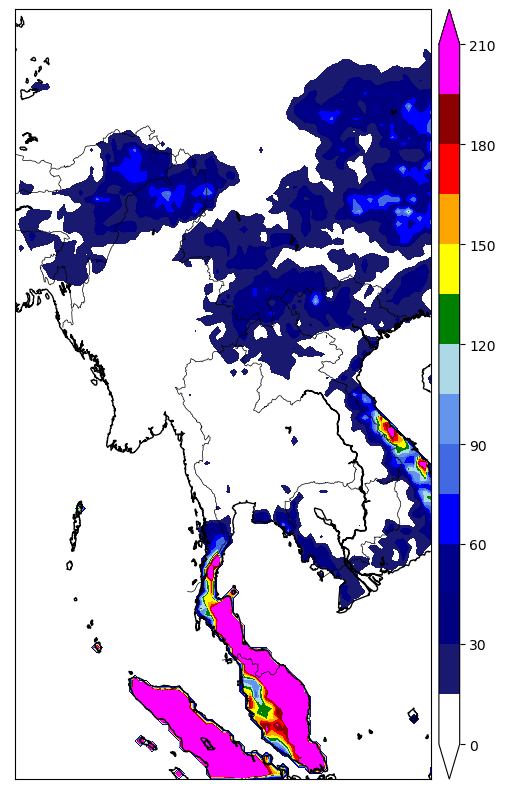

In [6]:
# For plotting Jan total precipitation

lons,lats= np.meshgrid(lon,lat)
x,y = map(lons,lats)
plt.figure(figsize=(15,10))

temp = map.contourf(x,y,sum(precip[0:31,:,:]), 
                    levels = [0, 5*3, 10*3, 15*3, 20*3, 25*3, 30*3, 35*3, 40*3, 45*3, 50*3, 55*3, 60*3, 65*3, 70*3], 
                    colors = ['white', 'midnightblue', 'navy', 'darkblue', 'blue', 'royalblue', 'cornflowerblue', 'lightblue', 'green', "yellow", "orange", "red", "darkred", "magenta"], 
                    extend='both')
cb = map.colorbar(temp,"right", size="5%", pad="2%")
map.drawcoastlines()
map.drawcountries()

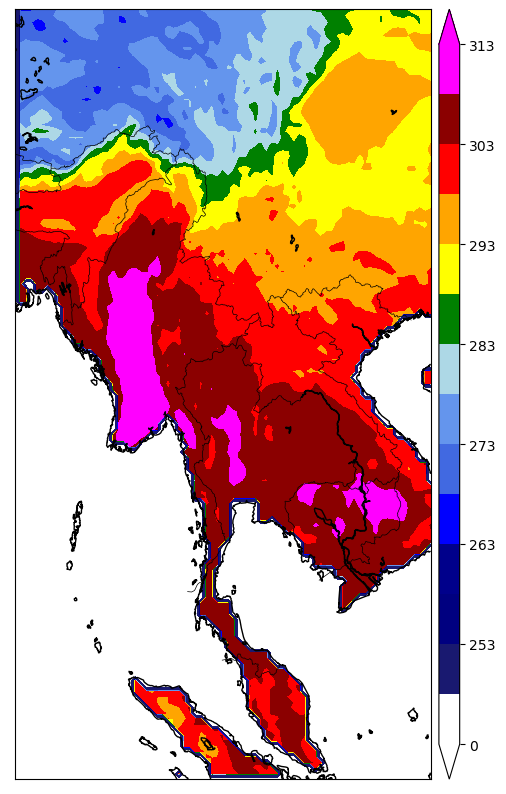

In [7]:
# For plotting Apr average Tmax

lons,lats= np.meshgrid(lon,lat)
plt.figure(figsize=(15,10))
x,y = map(lons,lats)
temp = map.contourf(x,y,sum(t_max[91:121,:,:])/30, 
                    levels = [0, 100, 253, 258, 263, 268, 273, 278, 283, 288, 293, 298, 303, 308, 313], 
                    colors = ['white', 'midnightblue', 'navy', 'darkblue', 'blue', 'royalblue', 'cornflowerblue', 'lightblue', 'green', "yellow", "orange", "red", "darkred", "magenta"], 
                    extend='both')
cb = map.colorbar(temp,"right", size="5%", pad="2%")
map.drawcoastlines()
map.drawcountries()

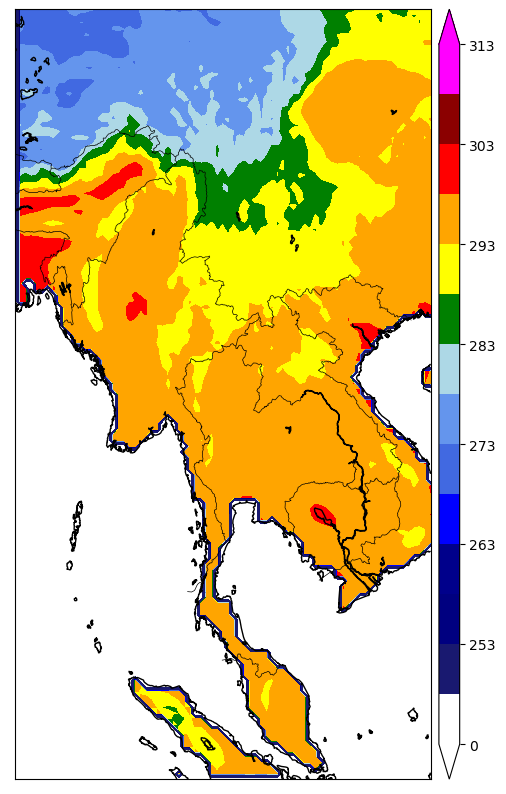

In [8]:
# For plotting Aug average Tmin

lons,lats= np.meshgrid(lon,lat)
plt.figure(figsize=(15,10))
x,y = map(lons,lats)
temp = map.contourf(x,y,sum(t_min[212:243,:,:])/31, 
                    levels = [0, 100, 253, 258, 263, 268, 273, 278, 283, 288, 293, 298, 303, 308, 313], 
                    colors = ['white', 'midnightblue', 'navy', 'darkblue', 'blue', 'royalblue', 'cornflowerblue', 'lightblue', 'green', "yellow", "orange", "red", "darkred", "magenta"], 
                    extend='both')
cb = map.colorbar(temp,"right", size="5%", pad="2%")
map.drawcoastlines()
map.drawcountries()